In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('seaborn-v0_8')
#import torch
import os

In [42]:
# Adjust paths as needed
path_regular = 'SYNTHDataset/SYNTHh1.csv'
path_additive = 'SYNTHDataset/SYNTH_additive.csv'
path_aditive_rev = 'SYNTHDataset/SYNTH_additive_reversals.csv'
path_multip = 'SYNTHDataset/SYNTH_multiplicative.csv'
path_multip_rev = 'SYNTHDataset/SYNTH_multiplicative_reversals.csv'

In [43]:
df = pd.read_csv(path_regular)
df['date'] = pd.to_datetime(df['date'])

df_add = pd.read_csv(path_additive)
df_add['date'] = pd.to_datetime(df_add['date'])

df_mult = pd.read_csv(path_multip)
df_mult['date'] = pd.to_datetime(df_mult['date'])

df_add_rev = pd.read_csv(path_aditive_rev)
df_add_rev['date'] = pd.to_datetime(df_add_rev['date'])

df_mult_rev = pd.read_csv(path_multip_rev)
df_mult_rev['date'] = pd.to_datetime(df_mult_rev['date'])


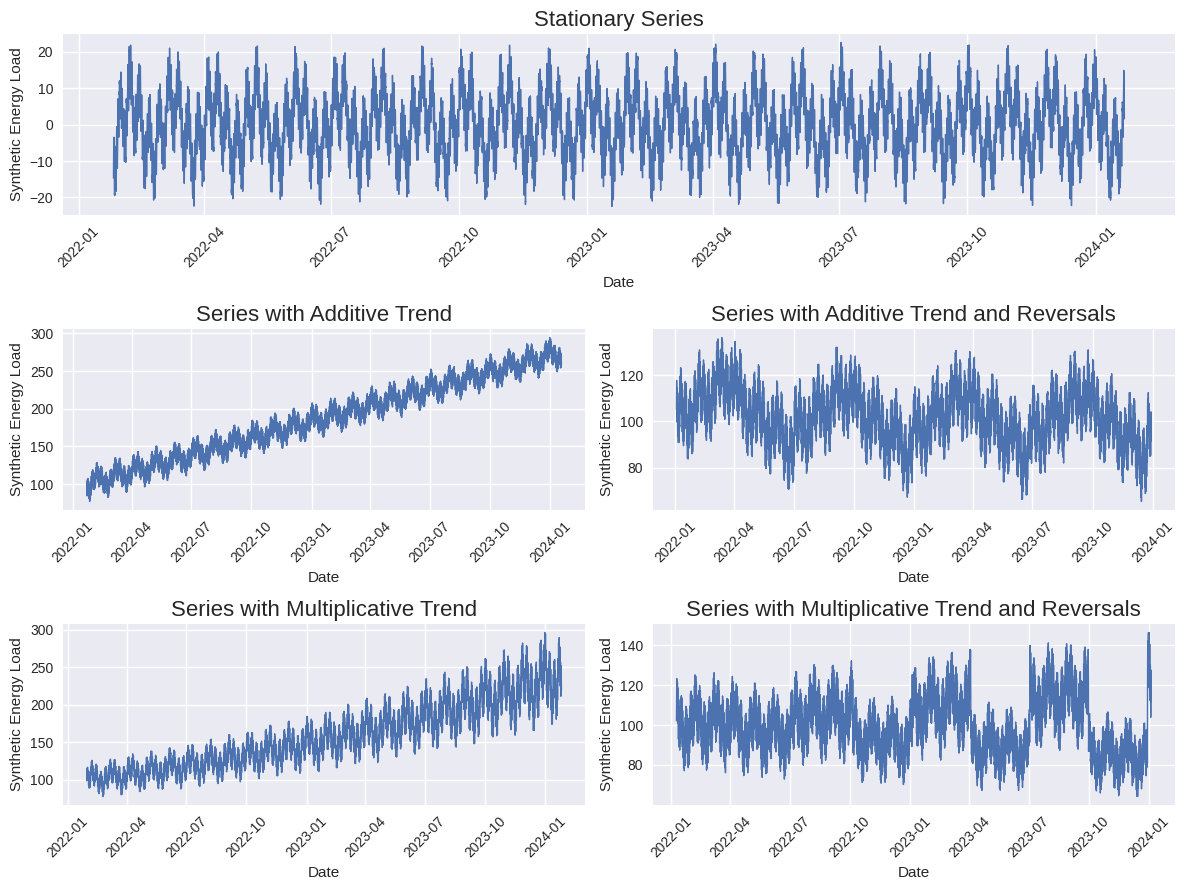

In [45]:
fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1])

# Creating subplots
ax0 = plt.subplot(gs[0, :])  # Spanning first row
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, 1])
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[2, 1])

# Plot for df (centered in the first row)
ax0.plot(df['date'], df['TARGET'], linewidth=1)
ax0.set_title('Stationary Series', fontsize=16)
ax0.set_xlabel('Date')
ax0.set_ylabel('Synthetic Energy Load')
ax0.tick_params(axis='x', rotation=45)

ax1.plot(df_add['date'], df_add['TARGET'], linewidth=1)
ax1.set_title('Series with Additive Trend', fontsize=16)
ax1.set_xlabel('Date')
ax1.set_ylabel('Synthetic Energy Load')
ax1.tick_params(axis='x', rotation=45)

ax2.plot(df_add_rev['date'], df_add_rev['TARGET'], linewidth=1)
ax2.set_title('Series with Additive Trend and Reversals', fontsize=16)
ax2.set_xlabel('Date')
ax2.set_ylabel('Synthetic Energy Load')
ax2.tick_params(axis='x', rotation=45)

ax3.plot(df_mult['date'], df_mult['TARGET'], linewidth=1)
ax3.set_title('Series with Multiplicative Trend', fontsize=16)
ax3.set_xlabel('Date')
ax3.set_ylabel('Synthetic Energy Load')
ax3.tick_params(axis='x', rotation=45)

ax4.plot(df_mult_rev['date'], df_mult_rev['TARGET'], linewidth=1)
ax4.set_title('Series with Multiplicative Trend and Reversals', fontsize=16)
ax4.set_xlabel('Date')
ax4.set_ylabel('Synthetic Energy Load')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('synth_series_all.png')
plt.show()



In [46]:
path_wind = 'WINDataset/DEWINDh_small.csv'
df_wind = pd.read_csv(path_wind)
df_wind['date'] = pd.to_datetime(df_wind['date'])

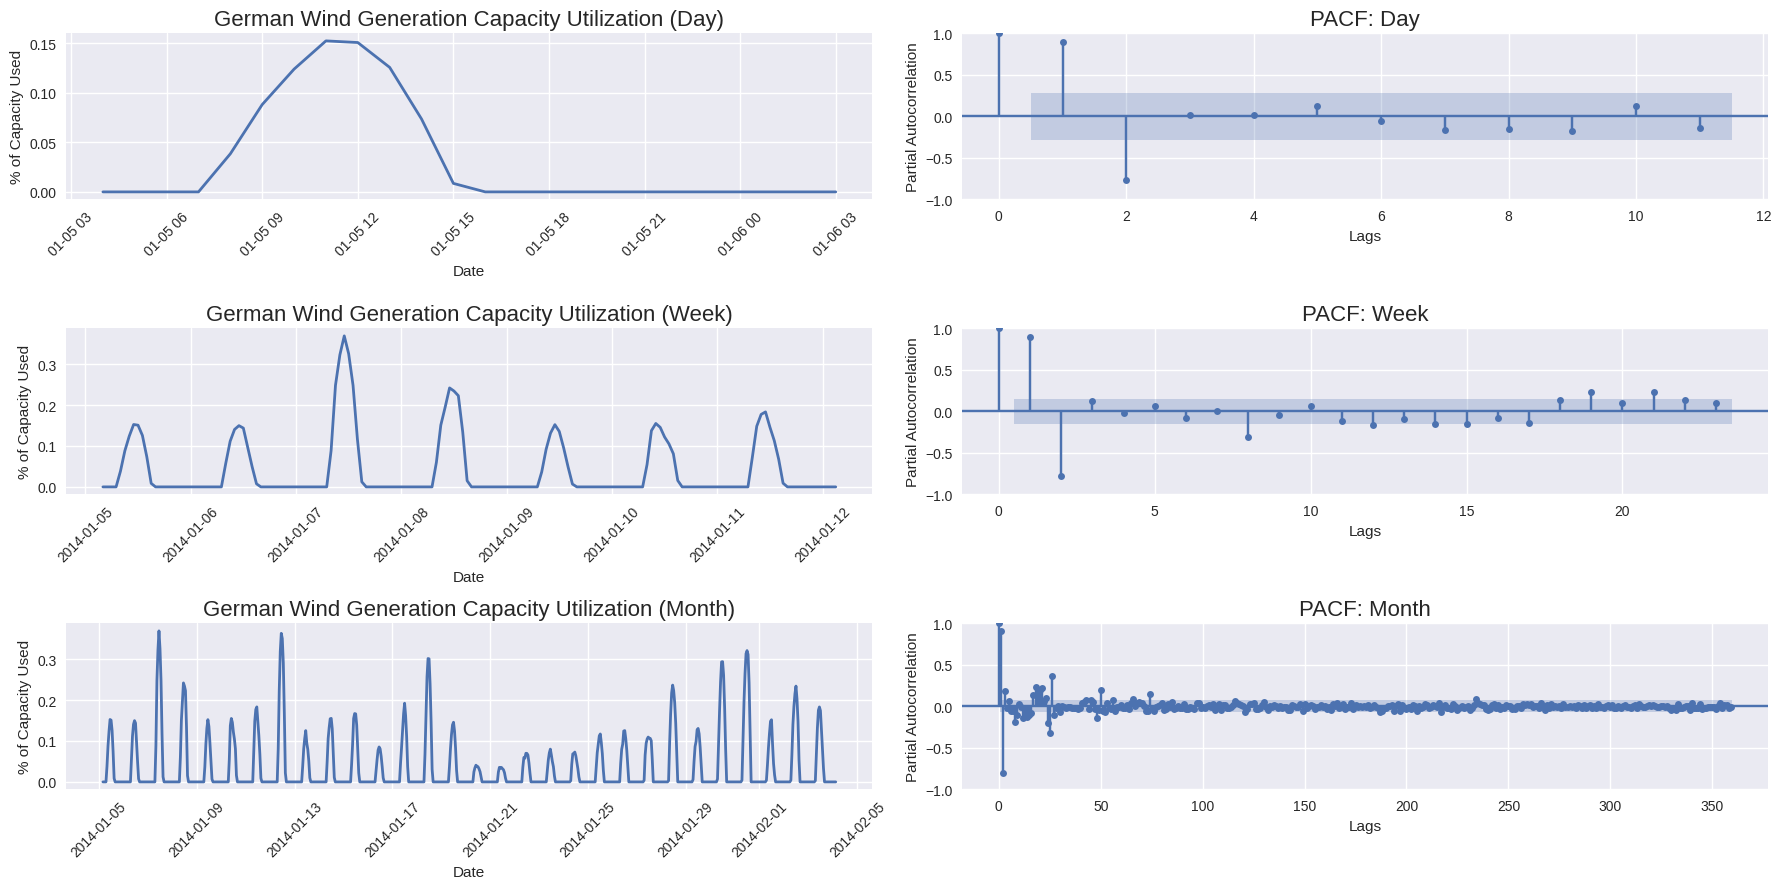

In [74]:
fig, axs = plt.subplots(3, 2, figsize=(18, 9))  # 3 rows, 2 columns

axs[0, 0].plot(df_wind.iloc[:24]['date'], df_wind.iloc[:24]['TARGET'], linewidth=2)
axs[0, 0].set_title('German Wind Generation Capacity Utilization (Day)', fontsize=16)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('% of Capacity Used')
axs[0, 0].tick_params(axis='x', rotation=45)

axs[1, 0].plot(df_wind.iloc[:168]['date'], df_wind.iloc[:168]['TARGET'], linewidth=2)
axs[1, 0].set_title('German Wind Generation Capacity Utilization (Week)', fontsize=16)
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('% of Capacity Used')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[2, 0].plot(df_wind.iloc[:720]['date'], df_wind.iloc[:720]['TARGET'], linewidth=2)
axs[2, 0].set_title('German Wind Generation Capacity Utilization (Month)', fontsize=16)
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('% of Capacity Used')
axs[2, 0].tick_params(axis='x', rotation=45)

plot_pacf(df_wind.iloc[:48]['TARGET'], ax=axs[0, 1], lags = 11)
axs[0, 1].set_title('PACF: Day', fontsize=16)
axs[0, 1].set_xlabel('Lags')
axs[0, 1].set_ylabel('Partial Autocorrelation')

plot_pacf(df_wind.iloc[:168]['TARGET'], ax=axs[1, 1])
axs[1, 1].set_title('PACF: Week', fontsize=16)
axs[1, 1].set_xlabel('Lags')
axs[1, 1].set_ylabel('Partial Autocorrelation')


plot_pacf(df_wind.iloc[:720]['TARGET'], ax=axs[2, 1], lags = 720 // 2 - 1)
axs[2, 1].set_title('PACF: Month', fontsize=16)
axs[2, 1].set_xlabel('Lags')
axs[2, 1].set_ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.savefig('pacf_wind_windows.png', dpi=300)
# plt.savefig('path
plt.show()
